1. Rename the *.lvm file from the Labview to .txt

In [39]:
import os

# Step 1: Specify the directory path variable
directory_path = '/home/eree-23/2023-07-17-2'

# Step 2: Rename files with '.lvm' extension to '.txt'
for filename in os.listdir(directory_path):
    if filename.endswith('.lvm'):
      new_filename = os.path.join(directory_path, filename[:-4] + '.txt')
      os.rename(os.path.join(directory_path, filename), new_filename)
      print(f'Renamed {filename} to {new_filename}')

Renamed 2023-07-17-2-scale.lvm to /home/eree-23/2023-07-17-2/2023-07-17-2-scale.txt


2. let's delete the unnessary files:

In [40]:
for filename in os.listdir(directory_path):
        
    # Step 1: Delete files with extension not ending in '.csv' or '.txt'
    if not (filename.endswith('.csv') or filename.endswith('.txt')):
        file_path = os.path.join(directory_path, filename)
        os.remove(file_path)
        print(f'Deleted {filename}')
        
    # Step 2: Delete files ending with 'Range.csv'
    if filename.endswith('Range.csv'):
        file_path = os.path.join(directory_path, filename)
        os.remove(file_path)
        print(f'Deleted {filename}')

Deleted 2023-07-17-2-10_Range.csv
Deleted 2023-07-17-2-10_cube.mat
Deleted 2023-07-17-2-10_Raw_0.bin
Deleted 2023-07-17-2-11_cube.mat
Deleted 2023-07-17-2-11_Range.csv
Deleted 2023-07-17-2-11_Raw_0.bin
Deleted 2023-07-17-2-12_cube.mat
Deleted 2023-07-17-2-12_Range.csv
Deleted 2023-07-17-2-12_Raw_0.bin
Deleted 2023-07-17-2-13_cube.mat
Deleted 2023-07-17-2-13_Range.csv
Deleted 2023-07-17-2-13_Raw_0.bin
Deleted 2023-07-17-2-14_cube.mat
Deleted 2023-07-17-2-14_Range.csv
Deleted 2023-07-17-2-14_Raw_0.bin
Deleted 2023-07-17-2-15_cube.mat
Deleted 2023-07-17-2-15_Range.csv
Deleted 2023-07-17-2-15_Raw_0.bin
Deleted 2023-07-17-2-16_cube.mat
Deleted 2023-07-17-2-16_Range.csv
Deleted 2023-07-17-2-16_Raw_0.bin
Deleted 2023-07-17-2-17_cube.mat
Deleted 2023-07-17-2-17_Range.csv
Deleted 2023-07-17-2-17_Raw_0.bin
Deleted 2023-07-17-2-18_cube.mat
Deleted 2023-07-17-2-18_Range.csv
Deleted 2023-07-17-2-18_Raw_0.bin
Deleted 2023-07-17-2-19_cube.mat
Deleted 2023-07-17-2-19_Range.csv
Deleted 2023-07-17-2-19_

3. Read the data from the scale output (.txt)

In [41]:
txt_file_count = 0
weight_list = []

for filename in os.listdir(directory_path):
        
    # New Task 1: Read numbers from a single '.txt' file into a list
    if filename.endswith('.txt'):
        txt_file_count += 1
        if txt_file_count > 1:
            print('Error: Multiple .txt files found!')
            break
        else:
            txt_file_path = os.path.join(directory_path, filename)
            with open(txt_file_path, 'r') as file:
                for line in file:
                    weight_list.append(float(line.strip()))

print(weight_list)

[131.3669, 136.3898, 136.288, 136.1855, 136.0922, 136.0031, 135.9146, 135.8275, 135.7386, 135.6504, 135.5629, 135.4774, 135.3882, 135.2991, 135.211, 135.1241, 135.0323, 134.9467, 134.8543, 134.77, 134.6832, 134.5929, 134.5055, 134.4148, 134.3282, 134.239, 134.1446, 134.0571, 133.9667, 133.8783, 133.788, 133.6973, 133.6075, 133.5159, 133.4263, 133.3354, 133.2466, 133.1591, 133.0695, 132.9812, 132.898, 132.808, 132.7221, 132.6372, 132.5527]


4. Get DBMC

In [42]:
# Step 1: Add disk_weight and dry_paper_weight variables
disk_weight = float(input("Enter the disk weight: "))
dry_paper_weight = float(input("Enter the dry paper weight: "))

DBMC = []

# Step 2: Iterate over numbers_list to calculate DBMC, skip all non-number items.
for item in weight_list:
    try:
        num = float(item)
        calculation = ((num - disk_weight - dry_paper_weight) / dry_paper_weight) * 100
        DBMC.append(calculation)
    except ValueError:
        print(f"Skipping non-number item: {item}")
    
print("DBMC:", DBMC)


DBMC: [109.74129107401234, 198.3817456675962, 196.5852539441642, 194.7764091342249, 193.12991917551952, 191.5575477358555, 189.99576465605486, 188.45868774926734, 186.88984576289113, 185.3333568630217, 183.7892210496596, 182.2803797691735, 180.7062436028661, 179.13387216320206, 177.57914798997655, 176.04560053647685, 174.42558147742898, 172.91497547029948, 171.28436805138873, 169.79670349062945, 168.26492076377363, 166.6713726043833, 165.12900151766507, 163.52839445169965, 162.00014117813163, 160.42600501182372, 158.7601030600359, 157.2159672466733, 155.62065436063955, 154.06063600748232, 152.4670878480925, 150.86648078212704, 149.2817562559557, 147.66526665019563, 146.0840715773126, 144.47993505805934, 142.912857798327, 141.3687219849644, 139.78752691208135, 138.229273285568, 136.76102071789066, 135.17276673843205, 133.65686655137134, 132.15861363074865, 130.6674196167011]


5. pull numbers out of CSV files (reuse old codes)

5.1: Sort the list based on its name. create an list have order

In [43]:
import re

#folder_path = '/home/eree-23/2023-06-26'

folder_path = directory_path
#make the old virables work

def get_csv_file_names(folder_path):
    csv_files = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            csv_files.append(file_name)
    return csv_files

# Call the function to get the list of CSV file names
csv_file_names = get_csv_file_names(folder_path)

# Print the list of CSV file names
print(csv_file_names)

# Specify the folder path where the CSV files are located

b = []

# Iterate over the original array of names and extract the last number
for name in csv_file_names:
    last_number = int(re.search(r'\d+', name[::-1]).group()[::-1])  # Extract the last number using regex
    b.append((last_number, name))  # Append a tuple of (last_number, name) to maintain the association

# Sort the original array based on the extracted last numbers
b.sort(key=lambda x: x[0])

# Extract the sorted names from the tuples
b = [name for _, name in b]

# Print the sorted names
print(b)



['2023-07-17-2-10_Power.csv', '2023-07-17-2-11_Power.csv', '2023-07-17-2-12_Power.csv', '2023-07-17-2-13_Power.csv', '2023-07-17-2-14_Power.csv', '2023-07-17-2-15_Power.csv', '2023-07-17-2-16_Power.csv', '2023-07-17-2-17_Power.csv', '2023-07-17-2-18_Power.csv', '2023-07-17-2-19_Power.csv', '2023-07-17-2-1_Power.csv', '2023-07-17-2-20_Power.csv', '2023-07-17-2-21_Power.csv', '2023-07-17-2-22_Power.csv', '2023-07-17-2-23_Power.csv', '2023-07-17-2-24_Power.csv', '2023-07-17-2-25_Power.csv', '2023-07-17-2-26_Power.csv', '2023-07-17-2-27_Power.csv', '2023-07-17-2-28_Power.csv', '2023-07-17-2-29_Power.csv', '2023-07-17-2-2_Power.csv', '2023-07-17-2-30_Power.csv', '2023-07-17-2-31_Power.csv', '2023-07-17-2-32_Power.csv', '2023-07-17-2-33_Power.csv', '2023-07-17-2-34_Power.csv', '2023-07-17-2-35_Power.csv', '2023-07-17-2-36_Power.csv', '2023-07-17-2-37_Power.csv', '2023-07-17-2-38_Power.csv', '2023-07-17-2-39_Power.csv', '2023-07-17-2-3_Power.csv', '2023-07-17-2-40_Power.csv', '2023-07-17-2-41

5.2 Pull data from these files 

In [44]:
import csv
import numpy as np

# Assuming you already have the array 'b' containing file names

RefNum = []  # Create an empty array to store the data

#folder_path = "/home/eree-23/2023-06-21"  # Update with the actual path to your folder        #Already have the folder above

for filename in b:
    if filename.endswith("_Power.csv"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            csv_reader = csv.reader(file)
            line_count = 0
            for row in csv_reader:
                line_count += 1
                if line_count == 8:
                    RefNum.append(row)
                    break

print(RefNum)  # Print the RefNum array

RefNum = [element for sublist in RefNum for element in sublist]    #flatten the array
print(RefNum)


[['77.69807'], ['77.44691'], ['74.82986'], ['77.271'], ['74.82997'], ['77.39579'], ['74.9338'], ['77.09019'], ['74.56686'], ['77.27494'], ['74.67397'], ['77.24532'], ['74.47221'], ['77.43076'], ['74.71076'], ['77.38994'], ['74.60722'], ['77.36858'], ['74.38881'], ['77.39461'], ['74.6168'], ['77.28246'], ['74.48804'], ['77.42965'], ['74.16315'], ['77.11107'], ['74.38023'], ['77.24632'], ['74.32946'], ['77.31412'], ['73.973'], ['77.32374'], ['74.10863'], ['77.15804'], ['74.14645'], ['77.42764'], ['73.91557'], ['77.19095'], ['73.9103'], ['77.18307'], ['73.75687'], ['77.36785'], ['73.93369'], ['77.14221'], ['73.80339'], ['77.22925'], ['73.86151'], ['77.30707'], ['74.0101'], ['77.23078'], ['73.97327'], ['77.24239'], ['74.32092'], ['77.21383'], ['73.73527'], ['77.17825'], ['73.98919'], ['77.10432']]
['77.69807', '77.44691', '74.82986', '77.271', '74.82997', '77.39579', '74.9338', '77.09019', '74.56686', '77.27494', '74.67397', '77.24532', '74.47221', '77.43076', '74.71076', '77.38994', '74.6

6. 1,2,4,6,8.... are all reference, 3,5,7,9..... are all WetPaper. we are going to create a new list for reference

In [45]:
Reference_Power = [float(RefNum[0])] + [float(num) for num in RefNum[1::2]]
Wet_Paper_Power = [float(num) for num in RefNum[2::2]]

print("Reference_Power:", Reference_Power)
print("Wet_Paper_Power:", Wet_Paper_Power)

Reference_Power: [77.69807, 77.44691, 77.271, 77.39579, 77.09019, 77.27494, 77.24532, 77.43076, 77.38994, 77.36858, 77.39461, 77.28246, 77.42965, 77.11107, 77.24632, 77.31412, 77.32374, 77.15804, 77.42764, 77.19095, 77.18307, 77.36785, 77.14221, 77.22925, 77.30707, 77.23078, 77.24239, 77.21383, 77.17825, 77.10432]
Wet_Paper_Power: [74.82986, 74.82997, 74.9338, 74.56686, 74.67397, 74.47221, 74.71076, 74.60722, 74.38881, 74.6168, 74.48804, 74.16315, 74.38023, 74.32946, 73.973, 74.10863, 74.14645, 73.91557, 73.9103, 73.75687, 73.93369, 73.80339, 73.86151, 74.0101, 73.97327, 74.32092, 73.73527, 73.98919]


6.1: Here is the test for the logic:

7. Now do the reference adjestment

7.1 We need to make sure Reference_Power is one item more than Wet_Paper_Power

In [46]:
temp = []

def print_red(text):
    print("\033[91m" + text + "\033[0m")


def check_and_modify_lists(Reference_Power, Wet_Paper_Power):
    if len(Reference_Power) == len(Wet_Paper_Power) + 1:
        print("These 2 lists are correct")
    else:
        print("These 2 lists are not correct")
        temp.append(Reference_Power.pop())

        if len(Reference_Power) == len(Wet_Paper_Power) + 1:
            print("Now they are correct")
        else:
            print_red("Too much error, abort")
            Reference_Power.extend(temp)
            print("Restored the last item in list 'Reference_Power':", Reference_Power)
            print("Aborting.")
#It might overrun or abort at the reference, not at wet paper, make list of reference 1 more than wetpaper

check_and_modify_lists(Reference_Power, Wet_Paper_Power)

print(Reference_Power)
print(Wet_Paper_Power)

These 2 lists are not correct
Now they are correct
[77.69807, 77.44691, 77.271, 77.39579, 77.09019, 77.27494, 77.24532, 77.43076, 77.38994, 77.36858, 77.39461, 77.28246, 77.42965, 77.11107, 77.24632, 77.31412, 77.32374, 77.15804, 77.42764, 77.19095, 77.18307, 77.36785, 77.14221, 77.22925, 77.30707, 77.23078, 77.24239, 77.21383, 77.17825]
[74.82986, 74.82997, 74.9338, 74.56686, 74.67397, 74.47221, 74.71076, 74.60722, 74.38881, 74.6168, 74.48804, 74.16315, 74.38023, 74.32946, 73.973, 74.10863, 74.14645, 73.91557, 73.9103, 73.75687, 73.93369, 73.80339, 73.86151, 74.0101, 73.97327, 74.32092, 73.73527, 73.98919]


Test would this work:

In [47]:
x1 = [0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 11.0]
x2= [2.0, 4.0, 6.0, 8.0, 10.0]

temp = []


def check_and_modify_lists(x1, x2):
    if len(x1) == len(x2) + 1:
        print("These 2 lists are correct")
    else:
        print("These 2 lists are not correct")
        temp.append(x1.pop())

        if len(x1) == len(x2) + 1:
            print("Now they are correct")
        else:
            print_red("Too much error, abort")
            x1.extend(temp)
            print("Restored the last item in list 'x1':", x1)
            print("Aborting.")


check_and_modify_lists(x1, x2)

print(x1)
print(x2)


These 2 lists are not correct
Too much error, abort
Restored the last item in list 'x1': [0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 11.0]
Aborting.
[0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 10.0, 11.0]
[2.0, 4.0, 6.0, 8.0, 10.0]


8. We average the 1st 2 items inside the Reference_Power, devided the 3rd item by the average, 4th..... get a new list store these numbers.

In [48]:
# Calculate the average of the 0th and 1st item in Reference_Power
average = (sum(Reference_Power[:2])) / 2

# Divide the 2nd item and all the following items in Reference_Power by the calculated average
Power_Downgrade = [item / average for item in Reference_Power[2:]]

print(Power_Downgrade)

[0.9961134417626661, 0.9977221306161502, 0.9937825896783771, 0.996164232964547, 0.9957823965686805, 0.9981729347607639, 0.997646717283408, 0.9973713619351395, 0.9977069190379217, 0.9962611745478326, 0.9981586255642947, 0.9940517572660101, 0.9957952877366705, 0.996669308926399, 0.9967933219624637, 0.994657255426505, 0.9981327143166346, 0.995081503765059, 0.994979921361297, 0.9973619513825069, 0.9944531882372217, 0.9955752354990796, 0.9965784261920688, 0.9955949589861044, 0.9957446254464695, 0.9953764536886723, 0.9949177859315849]


8.1 Let's test with the x1 and x2

In [49]:
# Calculate the average of the 0th and 1st item in Reference_Power
averageX = (sum(x1[:2])) / 2

# Divide the 2nd item and all the following items in Reference_Power by the calculated average
Test_Power_Downgrade = [item / averageX for item in x1[2:]]

print(averageX)
print(Test_Power_Downgrade)

0.5
[6.0, 10.0, 14.0, 18.0, 20.0, 22.0]


Test Passed!

9. Next devided the Wet_Paper_Power items with power downgrade to get adjust power:

In [50]:
adjust_power = [Wet_Paper_Power[0]]
for i in range(1, len(Wet_Paper_Power)):
    adjust_power.append(Wet_Paper_Power[i] / Power_Downgrade[i - 1])

print(Wet_Paper_Power)
print(adjust_power)

[74.82986, 74.82997, 74.9338, 74.56686, 74.67397, 74.47221, 74.71076, 74.60722, 74.38881, 74.6168, 74.48804, 74.16315, 74.38023, 74.32946, 73.973, 74.10863, 74.14645, 73.91557, 73.9103, 73.75687, 73.93369, 73.80339, 73.86151, 74.0101, 73.97327, 74.32092, 73.73527, 73.98919]
[74.82986, 75.12193577830364, 75.10487910469031, 75.03337326943155, 74.96150486930563, 74.78763458424278, 74.84751128611418, 74.78320602623286, 74.58486661945845, 74.78829561686531, 74.76758294210096, 74.29996405438357, 74.82530910117964, 74.64331365630622, 74.22020457285163, 74.34703701073823, 74.54472341651628, 74.05384969333045, 74.2756243788553, 74.12900342661028, 74.1292465563939, 74.21504689509284, 74.18978231511895, 74.26420044310306, 74.30056704518977, 74.63853492222081, 74.07777200952602, 74.36713972373174]


In [51]:
Test_adjust_power = [x2[0]]
for i in range(1, len(x2)):
    Test_adjust_power.append(x2[i] / Test_Power_Downgrade[i - 1])

print(Test_Power_Downgrade)
print(x2)
print(Test_adjust_power)

[6.0, 10.0, 14.0, 18.0, 20.0, 22.0]
[2.0, 4.0, 6.0, 8.0, 10.0]
[2.0, 0.6666666666666666, 0.6, 0.5714285714285714, 0.5555555555555556]


10. Cut the DBMC to make sure it have the same length as adjust_power (sometimes the LabView might kept running after mmWave quit running)

In [52]:
DBMC = DBMC[:len(adjust_power)]

10. Finally use the adjust power to make graph:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


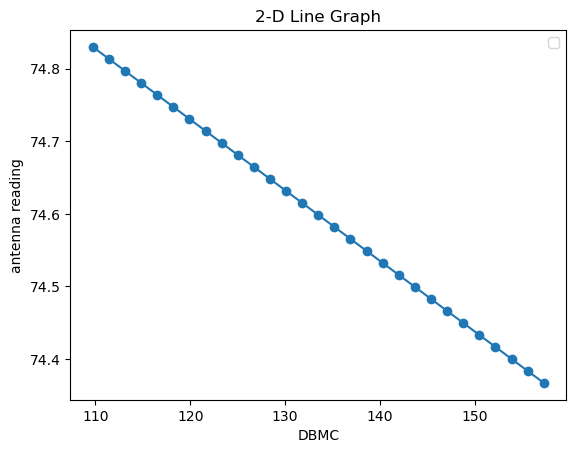

In [53]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
import os
import fnmatch
import re

#RefNum = RefNum[-(len(MoistureLevel)):]     #We have more data from antenna outputs, because we have references (background/References etc.) than the MoistureLevel, 
#                                            so we need to crop it. Since we only have 2 extra background data from the begining, we only need to crt the frount
#MoistureLevel = MoistureLevel[0:]
#b = [value for value in b if not np.isnan(value) and value != 0.0]
#print(len(MoistureLevel))
#print(len(RefNum))
#print(MoistureLevel)
#print(RefNum)

# b_devided = [x / bkg for x in b]
f = scipy.interpolate.interp1d(DBMC, adjust_power)
DBMC_new = np.linspace(DBMC[0], DBMC[-1], 29)
adjust_power_new = f(DBMC_new)


plt.plot(DBMC_new, adjust_power_new, '-o')

# Step 7: Add legend and labels to the graph
plt.xlabel('DBMC')
plt.ylabel('antenna reading')
plt.title('2-D Line Graph')
plt.legend()
plt.savefig(os.path.join(directory_path, f"{os.path.basename(directory_path)}.png"))
plt.show()